# Feature detection

## Harris Corner detection

As always we start with the imports

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

To start, we will use the same checkerboard image as earlier.

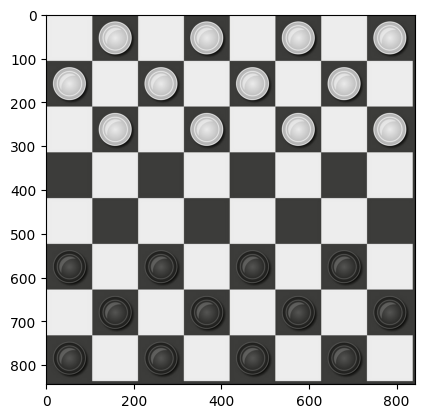

In [12]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [`cv2.cornerHarris`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345). Afterwards we want to draw the location of the detected corners on the image and display it.

[[-3.3376491e-05 -3.3376491e-05 -2.1489308e-04 ... -5.9126121e-11
  -5.1803948e-08 -4.9041578e-08]
 [-3.3376491e-05 -3.3376491e-05 -2.1489308e-04 ... -5.9126121e-11
  -5.1803948e-08 -4.9041578e-08]
 [ 1.1908785e-03  1.1908785e-03  4.8887539e-03 ... -5.9126121e-11
  -5.1803948e-08 -4.9041578e-08]
 ...
 [-2.3650434e-10 -2.3650434e-10 -2.3650434e-10 ...  1.3956514e-08
   2.4560595e-07  2.5665864e-07]
 [-9.9390974e-08 -9.9390974e-08 -9.9390974e-08 ... -1.7074993e-07
   1.5839547e-06  1.2256097e-06]
 [-9.0855529e-08 -9.0855529e-08 -9.0855529e-08 ... -8.6440956e-08
   9.7881457e-07  5.4797408e-07]]


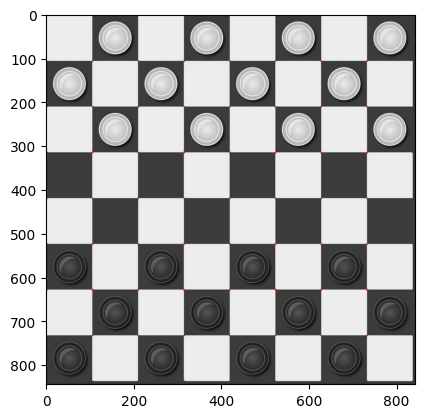

In [13]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
# Finding the corners in the image with cv2.cornerHarris
# The parameters are the image, the block size, the ksize and the k value
corners = cv2.cornerHarris(gray, 2, 3, 0.04)

print(corners)


### Draw the detected corners in the original image here ###
# Drawing the corners on the image
# The parameters are the image, the corners, the radius, the color and the thickness
img[corners > 0.01 * corners.max()] = [255, 0, 0]


# Display image
plt. imshow(img)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV, that method is implemented as [`cv2.goodFeaturesToTrack`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). 
Let's start with a different image this time.

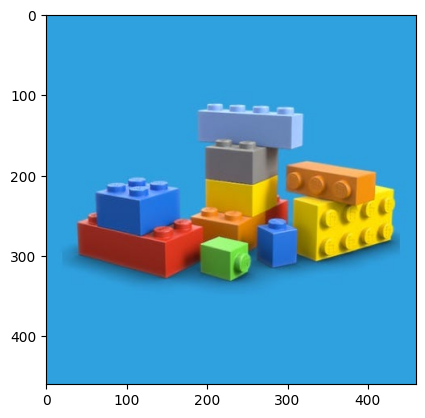

In [14]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

[[[192 286]]

 [[130 212]]

 [[250 285]]

 [[104 219]]

 [[420 279]]

 [[397 285]]

 [[336 305]]

 [[193 243]]

 [[410 214]]

 [[229 330]]

 [[182 263]]

 [[423 247]]

 [[400 252]]

 [[349 299]]

 [[374 292]]

 [[242 320]]

 [[246 114]]

 [[ 62 251]]

 [[277 258]]

 [[305 166]]

 [[240 159]]

 [[201 113]]

 [[351 265]]

 [[229 114]]

 [[308 230]]

 [[152 215]]

 [[103 205]]

 [[276 115]]

 [[ 51 255]]

 [[257 250]]

 [[ 74 218]]

 [[291 231]]

 [[193 264]]

 [[181 251]]

 [[308 122]]

 [[160 258]]

 [[256 213]]

 [[229 157]]

 [[218 112]]

 [[431 218]]

 [[274 166]]

 [[215 276]]

 [[228 296]]

 [[258 116]]

 [[375 258]]

 [[318 125]]

 [[288 117]]

 [[223 251]]

 [[135 267]]

 [[312 298]]

 [[256 172]]

 [[407 230]]

 [[198 206]]

 [[287 201]]

 [[211 157]]

 [[259 160]]

 [[263 265]]

 [[311 267]]

 [[189 120]]

 [[283 274]]

 [[115 233]]

 [[385 204]]

 [[ 39 261]]

 [[299 263]]

 [[148 285]]

 [[ 63 264]]

 [[409 197]]

 [[287 167]]

 [[ 62 223]]

 [[116 274]]

 [[392 236]]

 [[317

/tmp/ipykernel_235947/3565982042.py:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


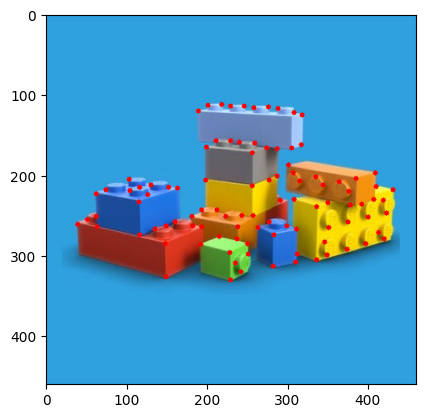

In [15]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert goodFeaturesToTrack detector here ###
# Finding the corners in the image with cv2.goodFeaturesToTrack
# The parameters are the image, the number of corners, the quality level, the minimum distance and the mask
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Converting the corners to integers
corners = np.int0(corners)

print(corners)

# Drawing the corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

    

### Draw the detected corners in the original image here ###

# Display image
plt. imshow(img)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

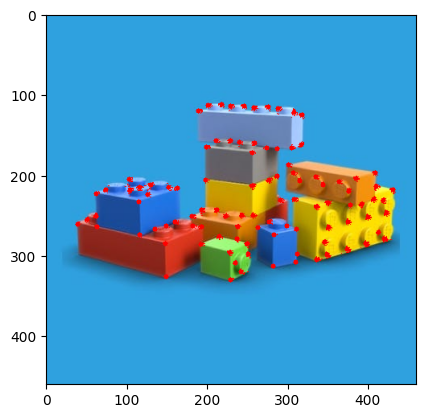

In [16]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
# Finding the corners in the image with cv2.cornerHarris
# The parameters are the image, the block size, the ksize and the k value
corners = cv2.cornerHarris(gray, 2, 3, 0.04)

#print(corners)

### Draw the detected corners in the original image here ###
# Drawing the corners on the image
# The parameters are the image, the corners, the radius, the color and the thickness
img[corners > 0.01 * corners.max()] = [255, 0, 0]


# Display image
plt. imshow(img)